In [1]:
import os

In [2]:
os.listdir('developer_survey_2020')

['README_2020.txt',
 'so_survey_2020.pdf',
 'survey_results_public.csv',
 'survey_results_schema.csv']

The first file contains short code for questions and about 60 other columns that provide various kinds of information about the devs.

The schema file contains those same short codes and the full question that short code stands for.

In [3]:
import pandas as pd

In [4]:
survey_raw_df = pd.read_csv('developer_survey_2020/survey_results_public.csv')

In [5]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [6]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

We refer to the schema file to look at the full question. As this file only contains two columns, we can use it as a series where column will become the index and value will be the full question.

In [7]:
# index_col parameter will make the column named 'Column' as index
# But this will create a dataframe which we do not require due to there being only one column now that first column is index
# So we will just retrieve the second column which will be fetched in the form of series with question short codes as index

schema_raw = pd.read_csv('developer_survey_2020/survey_results_schema.csv', index_col = 'Column').QuestionText

In [8]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [9]:
schema_raw['Age']

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

# Data Preparation and Cleaning

While the survey responses contain a lot of information, we will limit our analysis to a portion of this data:
- Demographics of survey respondents
- Distribution of programming skills and experiences
- Employment related information and preferences

For this we will select a subset of columns that we will work on.

In [10]:
selected_columns = [
    #Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    #Programming Experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [11]:
for s in selected_columns:
    print(schema_raw[s])

Where do you live?
What is your age (in years)? If you prefer not to answer, you may leave this question blank.
Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.
Which of the following best describes the highest level of formal education that you’ve completed?
What was your primary field of study?
Do you code as a hobby?
At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)
Including any education, how many years have you been coding in total?
NOT including education, how many years have you coded professionally (as a part of your work)?
Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)
Which programming, scripting, and marku

In [12]:
survey_df = survey_raw_df[selected_columns].copy()
schema = schema_raw[selected_columns].copy()

In [13]:
# We see that there are 64461 values for each column

survey_df.shape

(64461, 20)

In [14]:
# Let's use info method to find out some basic information about the data and get an idea about what needs to be done

survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Here we observe two things:
- Total values in a column should be 64461 but non-null values in most rows are much less. So we have a lot of null values
- Most columns have data type object. This is either due to different data type values existing (like string and int) or NaN values

It is fine to let datatype be object if we are working with strings but for numeric values, we need to process the data.
Also, we need to process all NaN values.

In [15]:
# Using schema, we can figure out which of these columns should have only numeric values based on the question
# For example, Age1stCode should be numeric. So, let's investigate

survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

We observe that all of the data should be numeric but some of it is in the form of a string such as 'Younger than 5 years'. 
We need to change that. Either make it null or decide an average value or maybe ignore rows with these values altogether.

In [16]:
# The following code converts all of the values to numbers but if they encounter a string it throws an error
# The parameter error comes into play here. It will replace all such values with NaN

survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

In [17]:
# Now that all these values are numeric, let's investigate further

survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


Now look at the information for age column. Max age cannot be 279 and min age cannot be 1. So, we will ignore rows that don't make sense with respect to age. This is because those rows are most probably false entries, whether it is intentional or not.

In [18]:
survey_df.drop(survey_df[survey_df.Age<10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age>100].index, inplace = True)

Similarly, we will drop rows that have workweekhrs more than 140 hours (20 hours per day) because it is highly unlikely.

In [19]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index, inplace = True)

The gender column also allows multiple values but for simplifying our analysis we will remove all rows containing more than 1 value.

In [20]:
survey_df.Gender.value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [21]:
# We can observe that semicolon is used to separate multiple options so we will replace such values with NaN 
# numpy contains where() method which takes two main arguments
# it takes a condition as an argument and a value as the second one. 
# Wherever the condition will hold true, it will replace that value with the value provided as the second argument

import numpy as np

survey_df.where(~(survey_df.Gender.str.contains(';', na = False)), np.nan, inplace = True)

In [22]:
survey_df.Gender.value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

# Exploratory Analysis and Visualization

Before actually working on the survey responses, we should take a look at the demographics of the respondants to get a better idea of how representative the survey is of the global programming community. This is important because surveys of this scale generally tend to have a selection bias.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Country

In [24]:
# n unique gives the total number of unique values instead of specifying all unique values

survey_df.Country.nunique()

183

We can find the countries with highest number of responses by using value_counts() method which sorts the data in descending order

In [25]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

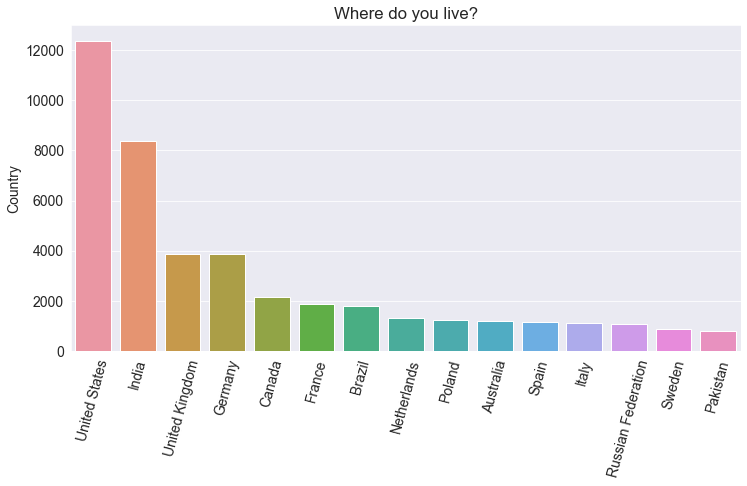

In [26]:
# Let's visualize this data
# xticks line rotates the names on x-axis
# We need that because if the names are long, we would have a readability problem

plt.figure(figsize = (12, 6))
plt.xticks(rotation = 75)
plt.title(schema.Country)
sns.barplot(x = top_countries.index, y = top_countries);

We can see that most people that have given the survey are from USA and India. This is expected as these countries have the highest population apart from China. Also, the survey was taken in English which is why the response from countries where the English language is popular is high. We can hence conclude that this data is not completely representative of global programming community.

# Age

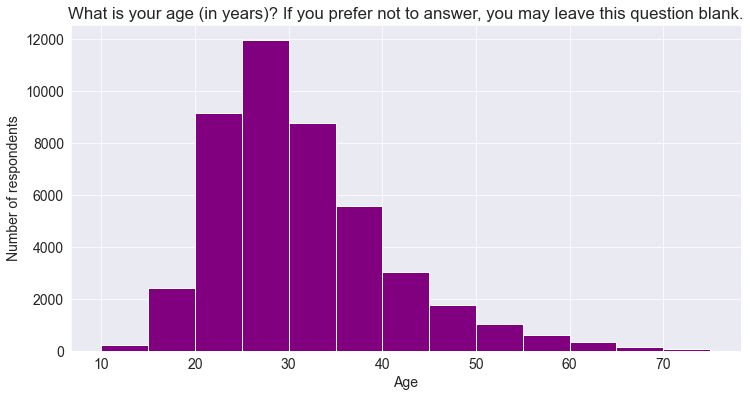

In [27]:
plt.figure(figsize = (12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(x = survey_df.Age, bins = np.arange(10, 80, 5), color = 'purple');

We can see that most of the respondents are between the age of 20 and 45. This does represent the global programming community in general. Also, nowadays, a lot of young people have taken computer as their field which is why we can see atleast 2000 people between the age of 5 and 20.

## Gender

We know that woman and non-binary genders are under-represented in the programming community. So, we might expect to observe that here as well.

In [28]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [29]:
# dropna = False shows the count of NaN values as well
# gender_counts = survey_df.Gender.value_counts(dropna = False)

gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

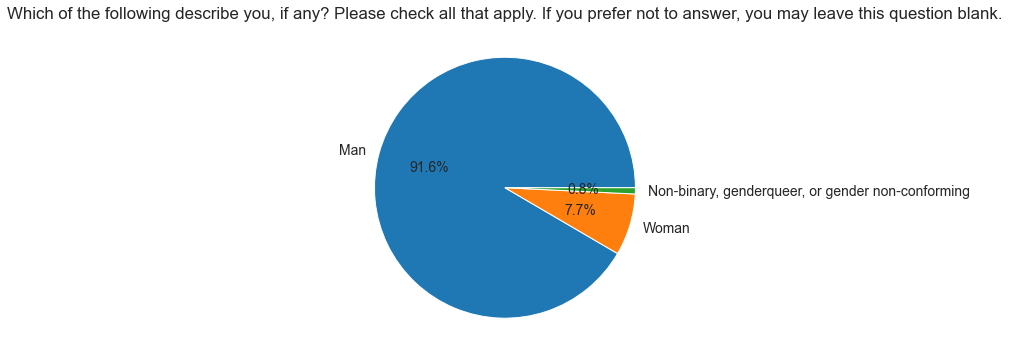

In [30]:
plt.figure(figsize = (12,6))
plt.title(schema.Gender)
plt.pie(x = gender_counts, labels = gender_counts.index, autopct = '%1.1f%%');

Only about 8% survey respondants identify as women or non-binary. This number is lower than the estimated number of woman and non-binary genders in the programming community which is 12%.  

# Education Level

Computer Science is a very popular choice for this field. In fact, a computer science degree is considered an important requirement in general. Let's see if this is indeed the case here as well.

In [31]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

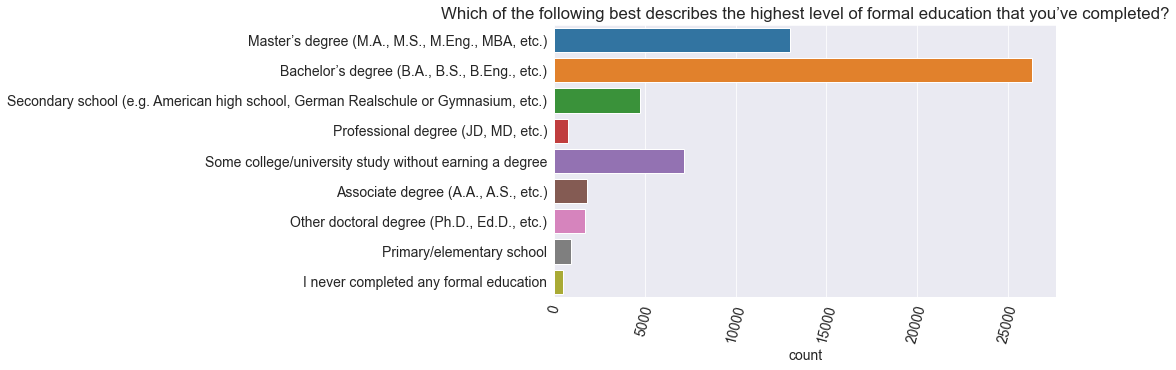

In [32]:
sns.countplot(y = survey_df.EdLevel)
plt.xticks(rotation = 75)
plt.title(schema.EdLevel)
plt.ylabel(None);

It is indeed clear that more than half of the respondents have some form of educational degree but we are still not sure if it is a computer science degree or not.

Let's also plot their undergrad majors but this time, we will change the numbers into percentages to get a better understanding of the data

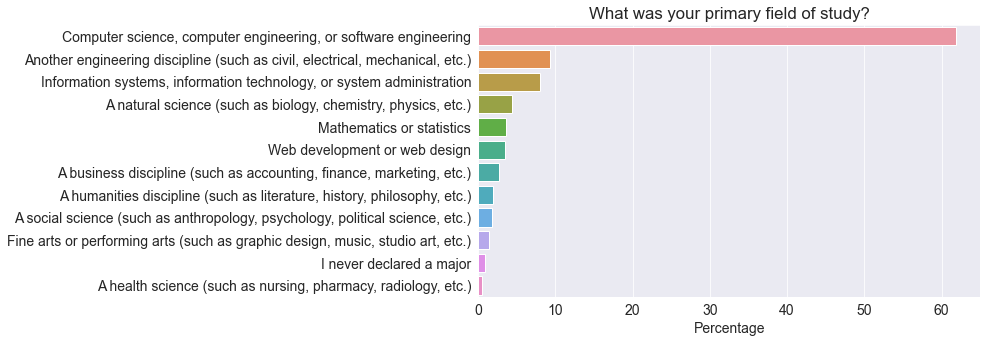

In [33]:
undergrad_pct = survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()

sns.barplot(x = undergrad_pct, y = undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage');

It turns out 40% of programmers holding a college degree have a field of study other than computer science degree which is very encouraging. This suggests that while majoring in a computer related field is helpful and popular, it is not a necessity for the field. It is possible to shift from different fields as well.

# Employment

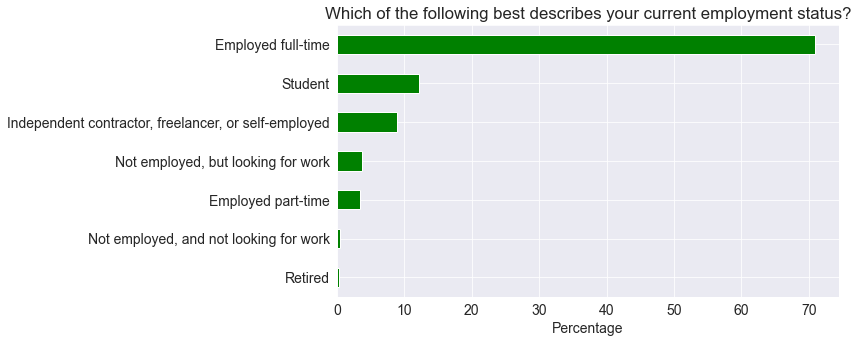

In [34]:
# This time we directly use pandas' plotting functions to create a horizontal bar chart (barh)
# Also, in value_counts() method, normalize = True gives the fraction of values and we multiply it by 100 to get percentages

(survey_df.Employment.value_counts(normalize = True, ascending = True)*100).plot(kind = 'barh', color = 'g');
plt.title(schema.Employment);
plt.xlabel('Percentage');

It seems that 10% respondents are employed as part times or freelancers which could be seen as an entry point to the field.

DevType field contains information about the roles held by the respondents. Since the question allows multiple answers, the column contains list of values separated by `;`, which makes it a bit harder to analyze. So, we will do some processing on the data.

In [35]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [36]:
survey_df.DevType.to_frame()

,DevType
0,"Developer, desktop or enterprise applications;..."
1,"Developer, full-stack;Developer, mobile"
2,NaN
3,NaN
4,NaN
...,...
64456,Senior executive/VP
64457,NaN
64458,NaN
64459,NaN


In [37]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                              4396
Developer, back-end                                                                                                                                                                                3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                     2214
Developer, back-end;Developer, full-stack                                                                                                                                                          1465
Developer, front-end                                                                                                                                                                               1390


Let's type a developer function who creates a sort of matrix... it basically divides the columns of DevType based on semi-colon and adds that specific combination before semi-colon as a separate column. It then assigns each column as true or false for each index.

In [38]:
# when we type results_df[temp_option] = something, then it automatically becomes a 2d matrix instead of 1d
# that's just the way to visualize it as it is just a dataframe in the end

def split_multicol(col_series):
    results_df = col_series.to_frame()
    options = []
    # iterates over all the columns
    for idx, value in col_series[col_series.notnull()].iteritems():
        # separates columns based on semi-colon
        for temp_option in value.split(';'):
            # add the column if it is not in our results_df already
            if not temp_option in results_df.columns:
                options.append(temp_option)
                results_df[temp_option] = False
            # Mark the value in the option column as True
            results_df.at[idx, temp_option] = True
    return results_df[options]

In [39]:
dev_type_df = split_multicol(survey_df.DevType)

In [40]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


True is 1 and False is 0. So, we can get column wise sum to find out the most commonly choosen options.

In [41]:
dev_type_totals = dev_type_df.sum().sort_values(ascending = False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

Now, we will plot a pie chart to see the percentage of women in data scientists.

In [42]:
ds_gendercounts = survey_df[dev_type_df['Data scientist or machine learning specialist']].Gender.value_counts()

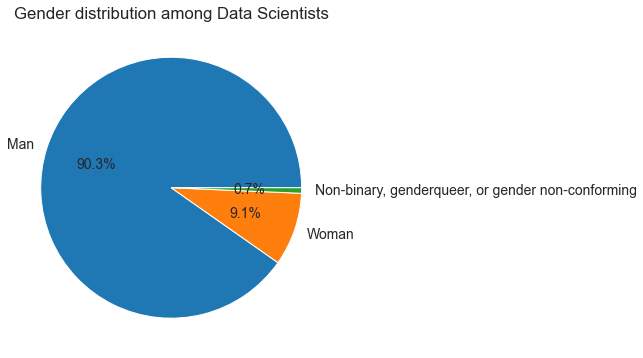

In [43]:
plt.figure(figsize = (12,6))
plt.title("Gender distribution among Data Scientists")
plt.pie(x = ds_gendercounts, labels = ds_gendercounts.index, autopct = '%1.1f%%');

This is an encouraging observation for women pursuing data science field as the percentage of women in the programming community is around 7%. This means that in general more women are pursuing data science field as compared to other fields on average.

# Asking and answering questions

**Q. Which were the most popular programming languages in the year 2020?**

To answer this, we can use the `LanguageWorkedWith` column. Just like before, multiple answers are allowed in this column. So, this column needs the same kind of processing as `DevType`.

In [44]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [45]:
languages_worked_df = split_multicol(survey_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It seems that there are 25 languages here. We can aggregate them using mean() to get the percentage of developers using these languages. True will evaluate to 1 and False to 0. This means that the average will simply be a fraction denoting the number of people who use a language divided by total number of people. We will multiply this by 100 to get the percentages.

In [46]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending = False)*100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

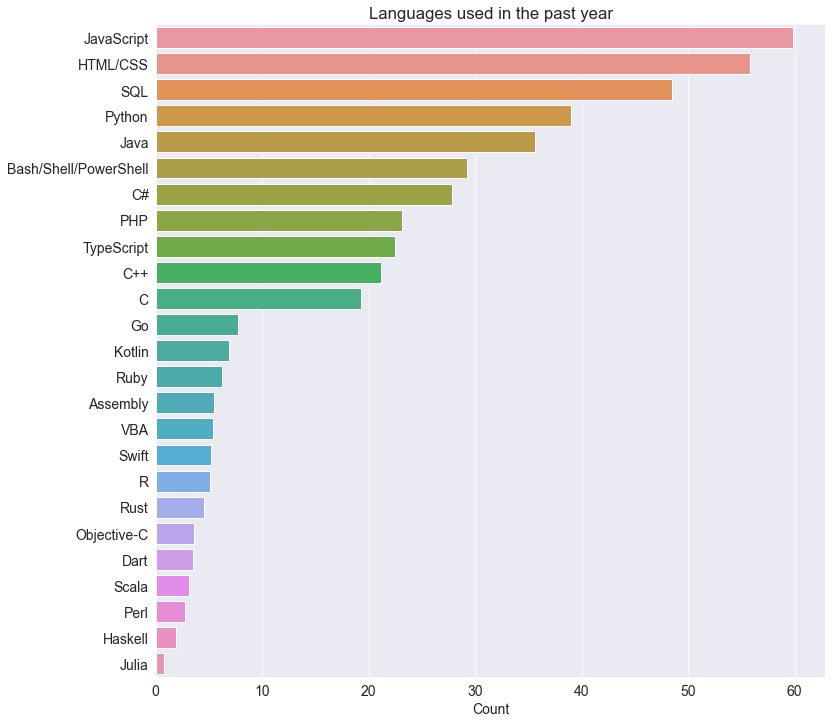

In [47]:
plt.figure(figsize = (12,12))
plt.title("Languages used in the past year")
plt.xlabel('Count')
sns.barplot(x = languages_worked_percentages, y = languages_worked_percentages.index);

It isn't surprising that javascript, HTML and CSS are the most popular languages as web development is one of the most sought after skills nowadays and it is easier to get started with. SQL is used to work with relational databases which are used by most companies which is why it is also popular. For other languages, python seems to be the most popular, beating java, which has been the industry standard for server and application development for over 2 decades.

**Q. What are the most popular languages for those who are in data science field?**

In [48]:
ds_language_percentages = languages_worked_df[dev_type_df['Data scientist or machine learning specialist']].mean().sort_values(ascending = False)*100
ds_language_percentages

Python                   78.420919
SQL                      58.365067
JavaScript               48.235593
HTML/CSS                 48.134044
Bash/Shell/PowerShell    39.451637
Java                     34.932724
C++                      29.576035
R                        27.621224
C                        24.904798
C#                       21.122112
PHP                      17.897944
TypeScript               13.886773
Go                        9.494796
VBA                       9.215537
Scala                     8.326987
Assembly                  7.286113
Ruby                      6.296014
Rust                      6.143691
Kotlin                    5.737497
Swift                     4.569688
Perl                      4.290429
Julia                     4.087332
Objective-C               3.655750
Haskell                   3.478040
Dart                      3.224169
dtype: float64

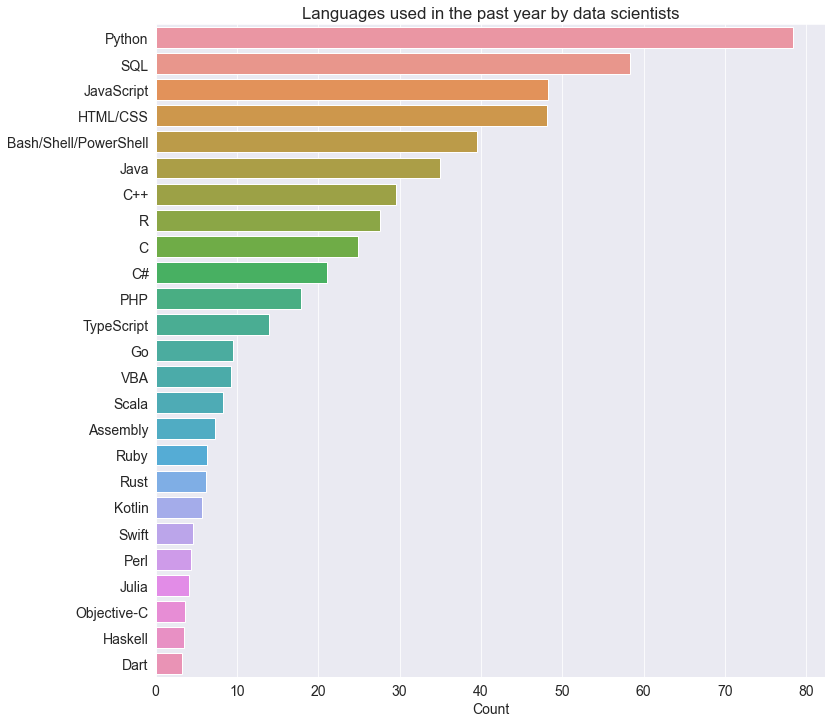

In [49]:
plt.figure(figsize = (12,12))
plt.title("Languages used in the past year by data scientists")
plt.xlabel('Count')
sns.barplot(x = ds_language_percentages, y = ds_language_percentages.index);

We can see that python is the most popular language for data scientists. This is not surprising as data scientists are not necessarily programming enthusiasts and python libraries like numpy, pandas, matplotlib, etc have made it really convenient for them to code. As they are constantly working with a large amount of data, SQL is the second most popular language among them. The results of their work has to be displayed on web to reach the world which is why languages involving web development come next. 

**Q. Which languages are the most people interested in to learn over the next year?**

This can be done by using `LanguageDesireNextYear` column and applying similar processing as we have done for popular languages.

In [50]:
languages_interested_df = split_multicol(survey_df.LanguageDesireNextYear)
languages_interested_df

,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,PHP,...,Assembly,Bash/Shell/PowerShell,C,Haskell,Perl,C++,Julia,Kotlin,Dart,VBA
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [108]:
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending = False)*100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

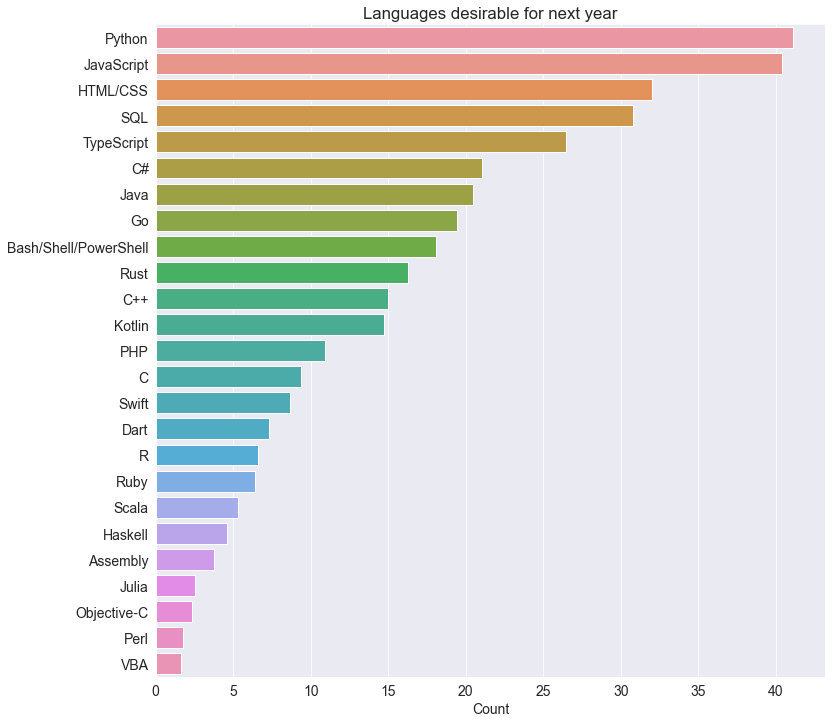

In [52]:
plt.figure(figsize = (12,12))
plt.title("Languages desirable for next year")
plt.xlabel('Count')
sns.barplot(x = languages_interested_percentages, y = languages_interested_percentages.index);

Once again, it's not surprising that python is the most desirable language due to its growing popularity.

**Q:  Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?**

While this question may seem tricky at first, it's straightforward to solve using Pandas array operations. Here's what we can do:

- Create a new data frame `languages_loved_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_interested_df` are both `True`
- Take the column-wise sum of `languages_loved_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who "love" the language
- Sort the results in decreasing order and plot a horizontal bar graph

In [130]:
languages_loved_df = languages_worked_df & languages_interested_df

In [131]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

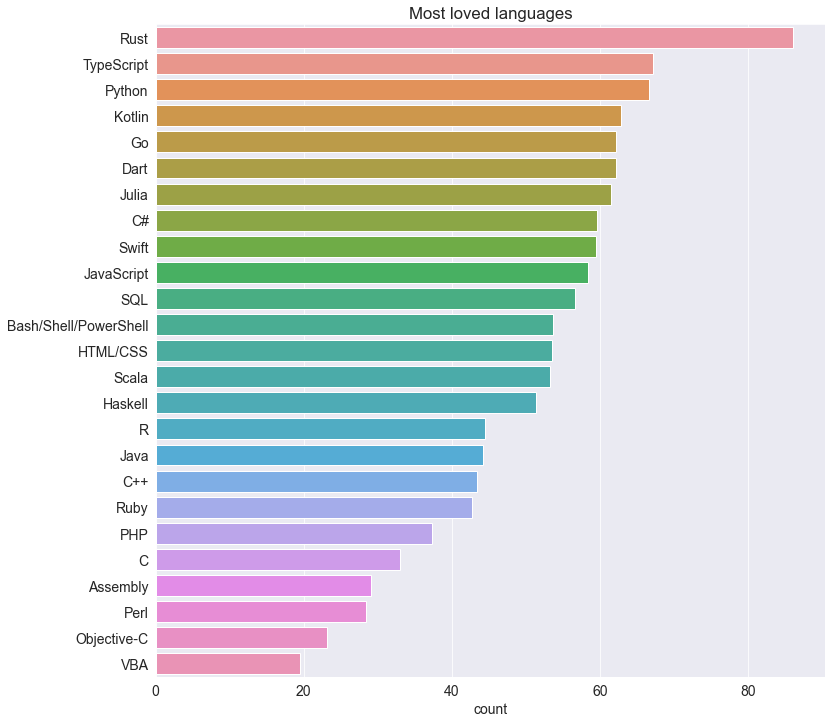

In [132]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

[Rust](https://www.rust-lang.org) has been StackOverflow's most-loved language for [four years in a row](https://stackoverflow.blog/2020/01/20/what-is-rust-and-why-is-it-so-popular/). The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.

**Q. In what countries do developers work the highest number of hours per week ? Consider countries with more than 250 responses only.**

We'll use the groupby method of data frame to aggregate the row for each country.

In [53]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending = False);
countries_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [106]:
high_countries_df = countries_df.loc[survey_df.Country.value_counts()>250].head(15)
high_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


So, we observe that asian countries in general have higher work week hours followed by United States. But the variation in work week hours is low (in range of 40 to 44 approximately).

**Q. Which field has the highest work week hours and which field has the lowest?**

In [60]:
dev_type_df.shape

(64306, 23)

In [59]:
dev_type_df.iloc[:, 1]

0         True
1         True
2        False
3        False
4        False
         ...  
64456    False
64457    False
64458    False
64459    False
64460    False
Name: Developer, full-stack, Length: 64306, dtype: bool

In [115]:
# the loop iterates over indexes of columns of dev_type_df
# dev_type_df.iloc() method in the next line gets the column[indexx] of dev_type_df which is a series of true false values
# the mean of workweekhrs of column[indexx] is then calculated and assigned to dev_hrs_mean
# in the last line, a new row is added to our dataframe with dev_type and dev_hrs_mean as values

dict = {'Dev_Type':[],
        'WorkWeekHrs':[]}

dev_hrs_df = pd.DataFrame(dict)
# dev_hrs_df.columns = ['']*len(dev_hrs_df.columns)

for indexx in range(dev_type_df.shape[1]):
    dev_hrs_mean = survey_df[dev_type_df.iloc[:, indexx]].WorkWeekHrs.mean()
    dev_hrs_df.loc[len(dev_hrs_df)] = [dev_type_df.columns[indexx], dev_hrs_mean]

In [103]:
dev_hrs_df.set_index('Dev_Type', inplace = True)

In [116]:
dev_hrs_df = dev_hrs_df.sort_values('WorkWeekHrs',ascending = False)
dev_hrs_df

,Dev_Type,WorkWeekHrs
20,Senior executive/VP,46.399390
14,Engineering manager,43.137710
22,Marketing or sales professional,43.122249
15,Product manager,42.969179
21,"Engineer, site reliability",41.702335
19,Scientist,41.645805
16,Data or business analyst,41.348697
7,DevOps specialist,41.331088
18,Data scientist or machine learning specialist,41.237117
11,"Engineer, data",41.205020


In [109]:
type(dev_hrs_df.index)

pandas.core.indexes.base.Index

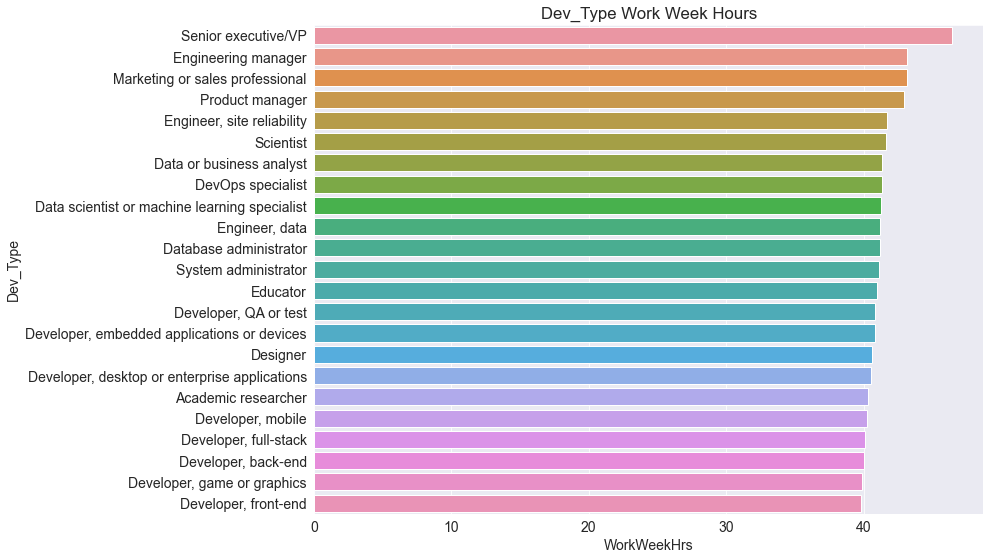

In [122]:
plt.figure(figsize = (12, 9))
plt.title('Dev_Type Work Week Hours')
plt.xlabel('Work Week Hours')
sns.barplot(data = dev_hrs_df, x = 'WorkWeekHrs', y = 'Dev_Type');
# sns.barplot(x = dev_hrs_df, y = dev_hrs_df.index);

**Q: How important is it to start young to build a career in programming?**

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [123]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

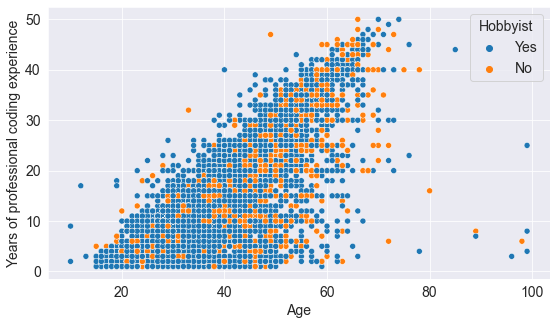

In [124]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

You can see points all over the graph, which indicates that you can **start programming professionally at any age**. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the `Age1stCode` column to see when the respondents tried programming for the first time.

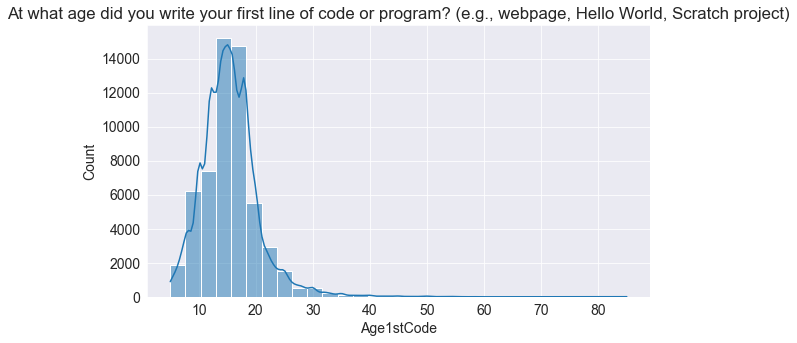

In [125]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

As you might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code.

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.